In [1]:
import os
import numpy as np
# import working directory to check functions
os.chdir('/Users/Dominik/R-workspace/cecelia/inst')

# MacOS
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# config
import py.config_utils as cfg

%load_ext autoreload
%autoreload 2

In [6]:
base_dir = '/Volumes/USER_data/Dominik/CECELIA_BACKUP/CV5iNI/ANALYSIS/'
#base_dir = '/Volumes/Analysis_SSD/Communal/cecelia/projects/az8y8l/ANALYSIS'
zero_dir = os.path.join(base_dir, '0/tK0DVg/')
im_path = os.path.join(zero_dir, 'ccidImage.ome.zarr')
#im_path = os.path.join(zero_dir, 'ccidCorrected.zarr')
#im_path = os.path.join(zero_dir, 'ccidSlidingWindow.zarr')
#im_path = os.path.join(zero_dir, 'ccidImage.zarr')
#im_path = os.path.join(zero_dir, 'ccidN2V.zarr')
version_num = 1
task_dir = os.path.join(base_dir, str(version_num), 'ubOEjc')

In [3]:
from py.napari_utils import NapariUtils

napari_utils = NapariUtils()
napari_utils.open_viewer()
napari_utils.task_dir = task_dir

In [4]:
channel_names = [
    # 'EB', 'T-A', 'T-B', 'AF', 'gen'
    'One'
]

In [8]:
napari_utils.open_image(
    im_path,
    use_channel_axis = True, as_dask = True,
    downsample_z = False, squeeze = False,
    visible = False
)

[91, 9, 16, 512, 512]
[512, 512, 16, 9, 91]
['X', 'Y', 'C', 'Z', 'T']
[91, 9, 16, 512, 512]


In [64]:
import py.zarr_utils as zarr_utils

# you could subtract the minimum of every row to get rid of these stripes?
channels = [9, 13]

t_val = dim_utils.dim_val('T')
c_val = dim_utils.dim_val('C')
t_idx = dim_utils.dim_idx('T', squeeze = True)
c_idx = dim_utils.dim_idx('C', squeeze = True)
is_3D = napari_utils.dim_utils.is_3D()
slices = [slice(None) for _ in range(len(napari_utils.im_data[0].shape))]

def process_slice(im, stripe_perc = 20, axis = 1):
    # get row value
    row_perc = np.percentile(im, stripe_perc, axis = axis)

    # correct
    corrected = (im.T - row_perc).T
    corrected[corrected < 0] = 0
    
    return corrected.astype(im.dtype)

# go through all channels, timepoints and Z
for i in channels:
    if napari_utils.dim_utils.is_timeseries():
        if is_3D:
            # prepare slices
            slices[napari_utils.dim_utils.dim_idx('C')] = c
            slices[napari_utils.dim_utils.dim_idx('T')] = t
            slices[napari_utils.dim_utils.dim_idx('Z')] = z
        
            # get image
            im = zarr_utils.fortify(im_data[tuple(slices)])
        else:
            asd
    else:
        if is_3D:
            asd
        else:
            asd



Text(0.5, 1.0, 'Correction')

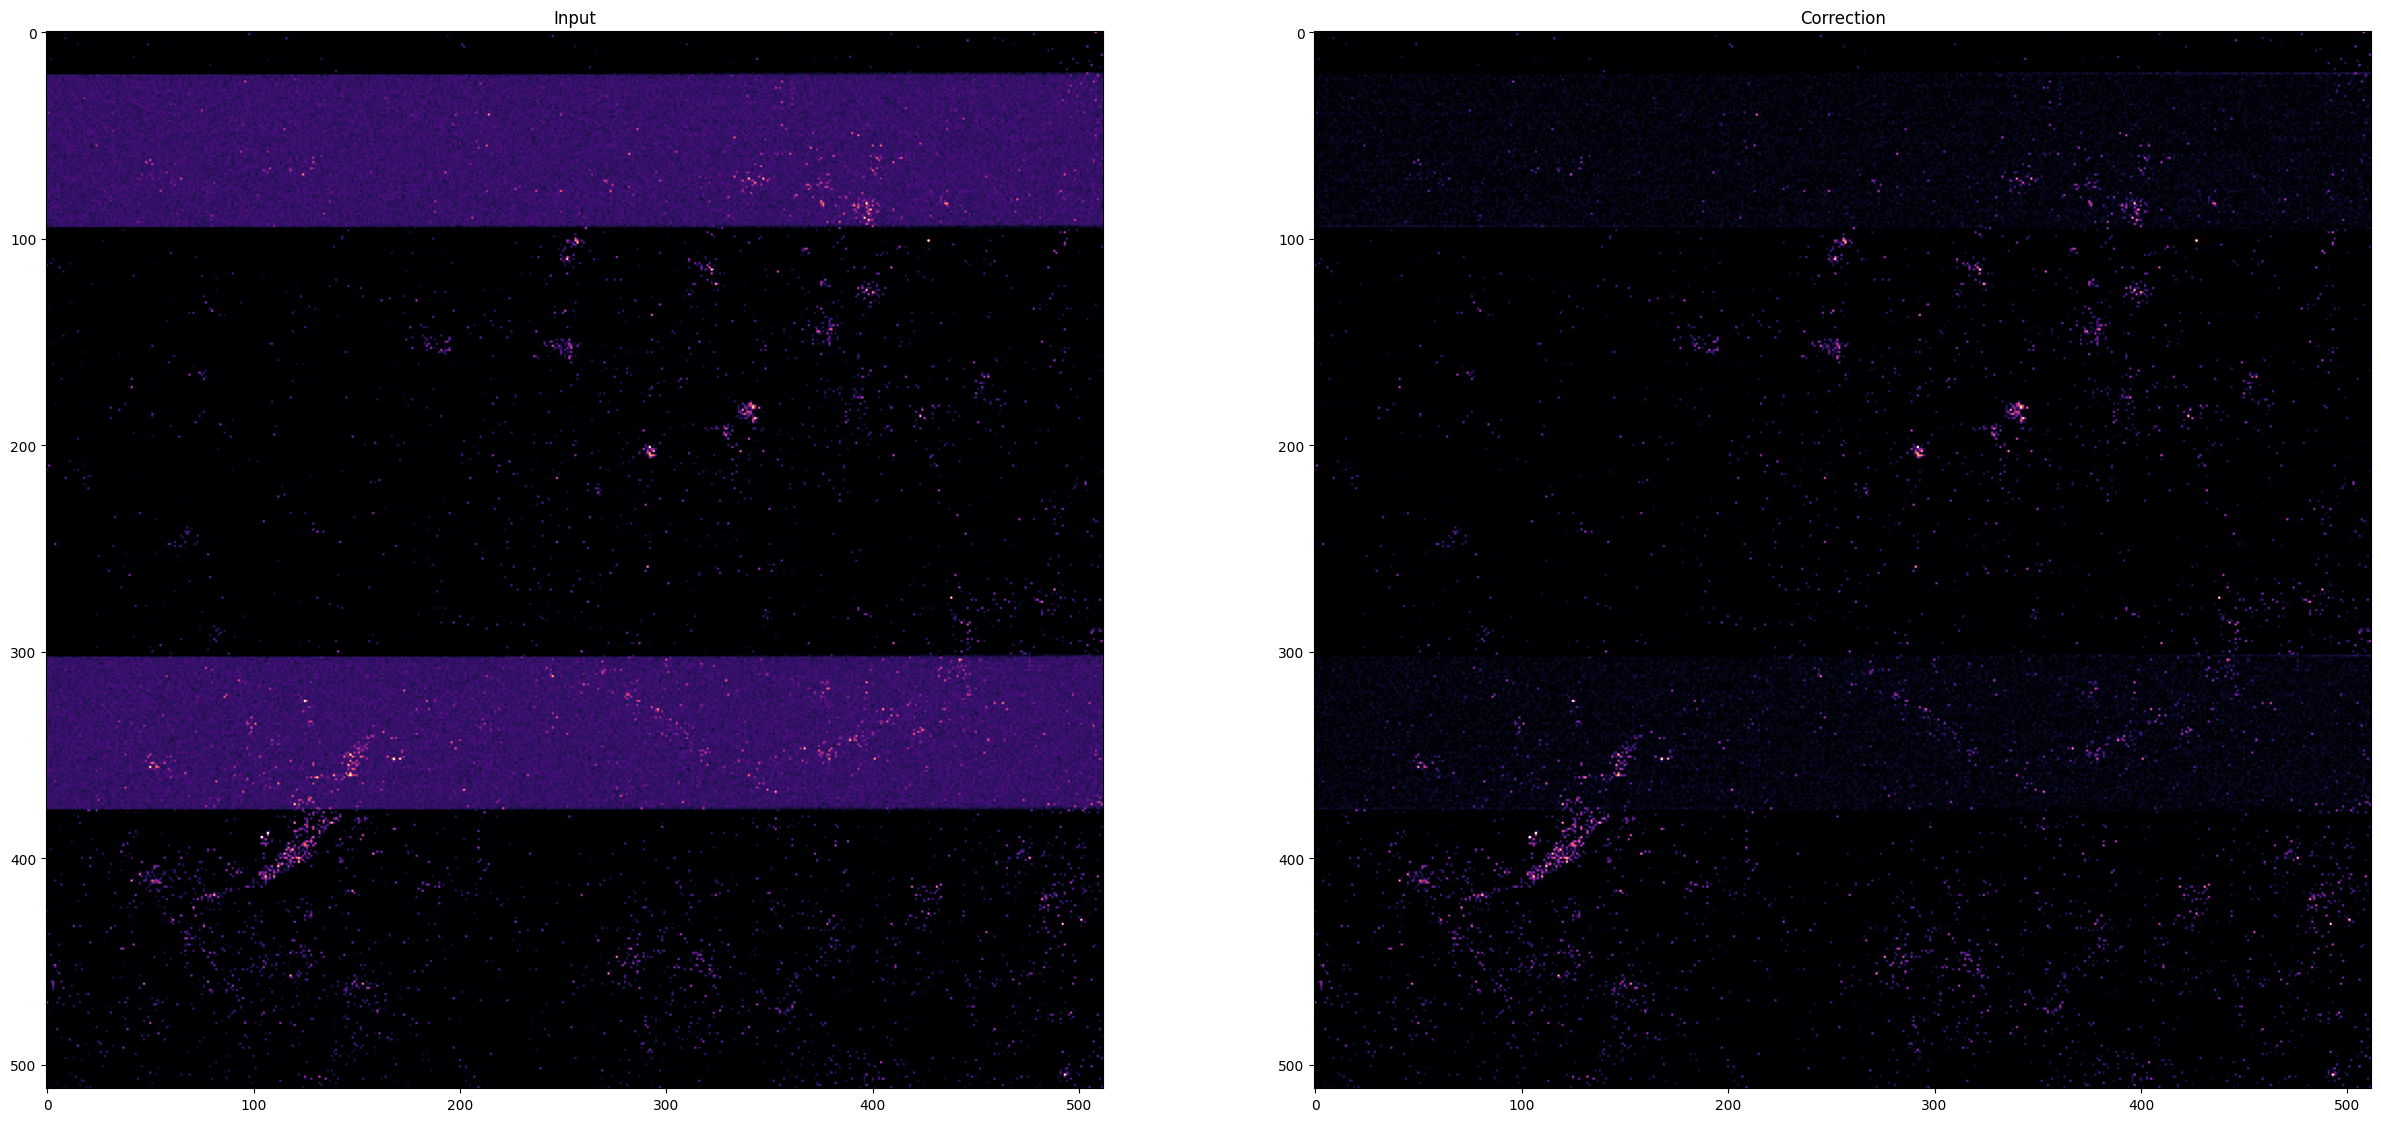

In [68]:
from matplotlib import pyplot as plt

plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(
    im, cmap='magma',
    vmin=np.percentile(im,0.01),
    vmax=np.percentile(im,99.99)
)
plt.title('Input')

plt.subplot(1,2,2)
plt.imshow(corrected,
           cmap='magma',
           vmin=np.percentile(corrected,0.01),
           vmax=np.percentile(corrected,99.99)
          )
plt.title('Correction')

In [ ]:
import py.zarr_utils as zarr_utils

im = zarr_utils.fortify(napari_utils.im_data[0])

In [ ]:
a, a_chunks = zarr_utils.create_zarr_from_ndarray(
    im, dim_utils = None, im_chunks = (1, 1, 1024, 1024), copy_values = False)

In [ ]:
a.chunks

In [ ]:
import py.zarr_utils as zarr_utils

# can you somehow get the signal that is in all channels across the planes?
#planes = (2, 6, 10)
planes = (6, 10, 14)
slices = [slice(None) for _ in range(len(napari_utils.im_data[0].shape))]
c_idx = napari_utils.dim_utils.dim_idx('C')

# go through planes
imgs = []
for i in planes:
    slices[c_idx] = i
    imgs.append(napari_utils.im_data[0][tuple(slices)])

In [ ]:
import dask.array as da

im_max = da.max(da.stack(imgs), axis = 0)
im_min = da.min(da.stack(imgs), axis = 0)

In [ ]:
im_max_array = zarr_utils.fortify(im_max)
im_min_array = zarr_utils.fortify(im_min)

In [ ]:
im_max_range = (np.percentile(im_max_array, 0.01), np.percentile(im_max_array, 99.99))
im_min_range = (np.percentile(im_min_array, 0.01), np.percentile(im_min_array, 99.99))
(im_max_range, im_min_range)

In [ ]:
# normalise
im_max_norm = (im_max_array - im_max_range[0]) / (im_max_range[1] - im_max_range[0])
im_min_norm = (im_min_array - im_min_range[0]) / (im_min_range[1] - im_min_range[0])

im_max_norm[im_max_norm > 1] = 1
im_min_norm[im_min_norm > 1] = 1

In [ ]:
napari_utils.viewer.add_image(
    im_max_norm,
    scale = napari_utils.im_scale,
    blending = 'additive',
    colormap = 'green'
)
napari_utils.viewer.add_image(
    im_min_norm,
    scale = napari_utils.im_scale,
    blending = 'additive',
    colormap = 'magenta'
)

In [ ]:
im_norm_diff_range

In [ ]:
#im_norm_diff = np.abs(im_max_norm - im_min_norm)
im_norm_diff = (im_min_norm + 1) / (im_max_norm + 1)
im_norm_diff_range = (im_norm_diff.min(), im_norm_diff.max())
im_norm_diff = (im_norm_diff - im_norm_diff_range[0]) / (im_norm_diff_range[1] - im_norm_diff_range[0])

In [ ]:
# take minimum across planes?
napari_utils.viewer.add_image(
    im_norm_diff,
    scale = napari_utils.im_scale,
    blending = 'additive',
    colormap = 'gray'
)

In [ ]:
napari_utils.show_labels_all(
    show_labels = False,
    show_points = False,
    show_tracks = True,
    value_names = ['IJ.manual']
)

In [ ]:
napari_utils.dim_utils.im_scale(
    dims = napari_utils.dim_utils.trimmed_default_dim_order(
        ignore_channel = True, squeeze = True))

In [ ]:
napari_utils.im_scale.copy()

In [ ]:
value_name = 'merged'

labels_view = napari_utils.label_props_utils.label_props_view(value_name = value_name)

if labels_view is not None:
    if labels_view.has_cols(['track_id'], dat_type = 'obs'):
        # get tracks
        tracks = labels_view.view_centroid_cols(napari_utils.dim_utils.im_dim_order)\
            .view_obs_cols(['track_id'])\
            .as_df()\
            .dropna()\
            .to_numpy()
        
        labels_view.close()

In [ ]:
napari_utils.dim_utils.im_dim_order

In [ ]:
napari_utils.im_scale

In [ ]:
tracks[0:4]

In [ ]:
tracks2 = np.insert(tracks, 1, 0, axis = 1)

In [ ]:
tracks2.shape

In [ ]:
len(napari_utils.im_scale)

In [ ]:
tracks.shape

In [ ]:
napari_utils.im_scale

In [ ]:
napari_utils.im_data[0].shape

In [ ]:
import py.zarr_utils as zarr_utils

In [ ]:
tmp, _ = zarr_utils.open_labels_as_zarr(os.path.join(task_dir, 'labels', 'merged_nuc.zarr'))

In [ ]:
a = zarr_utils.fortify(tmp[0][0, 0, :, :])

In [ ]:
a.max()

In [ ]:
labels = dict()

tmp, _ = zarr_utils.open_labels_as_zarr(os.path.join(task_dir, 'labels', 'cells.zarr'))
labels['cyto'] = zarr_utils.fortify(tmp[0][0, 0, :, :])
tmp, _ = zarr_utils.open_labels_as_zarr(os.path.join(task_dir, 'labels', 'nuclei.zarr'))
labels['nuc'] = zarr_utils.fortify(tmp[0][0, 0, :, :])

In [ ]:
import py.label_utils as label_utils

labels_merged = label_utils.match_masks(
    [labels['nuc'], labels['cyto']],
    # [interm_labels['cyto'], interm_labels['nuc']],
    stitch_threshold = 0.05,
    remove_unmatched = True
)

In [ ]:
napari_utils.viewer.add_labels(labels_merged[1])

In [ ]:
from scipy import ndimage as ndi

contours = np.copy(labels)
eroded_labels = np.copy(labels)
thickness = 1
background_label = 0

# go through all z-axis
for i in range(labels.shape[0]):
    cur_labels = labels[i,:,:]
    
    # adapted from from napari
    # https://github.com/napari/napari/blob/996f502a7f94f68275625dd8b9e94978167f63f9/napari/layers/labels/_labels_utils.py#L208
    struct_elem = ndi.generate_binary_structure(cur_labels.ndim, 1)
    thick_struct_elem = ndi.iterate_structure(struct_elem, thickness).astype(bool)

    dilated_labels = ndi.grey_dilation(cur_labels, footprint=struct_elem)
    eroded_labels[i,:,:] = ndi.grey_erosion(cur_labels, footprint=thick_struct_elem)
    not_boundaries = dilated_labels == eroded_labels[i,:,:]

    contours[i,:,:][not_boundaries] = background_label
    eroded_labels[i,:,:] = eroded_labels[i,:,:] - contours[i,:,:]

In [ ]:
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt

# perform skeletonization
skeleton = skeletonize(contours)

# now convert to skan
import skan

sk_skeleton = skan.Skeleton(skeleton)
paths_table = skan.summarize(sk_skeleton)

In [ ]:
from skimage.util import invert

bin_labels = np.copy(eroded_labels)
bin_labels[bin_labels > 0] = 2
bin_labels[bin_labels == 0] = 1
bin_labels[bin_labels == 2] = 0

from skimage.morphology import (erosion, dilation, opening, closing,
                                white_tophat)

morph_labels = white_tophat(bin_labels, ndi.generate_binary_structure(bin_labels.ndim, 1))

# perform skeletonization
skeleton = skeletonize(morph_labels)

# display results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

z_val = 8
ax[0].imshow(bin_labels[z_val,:,:], cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Bin', fontsize=20)

ax[1].imshow(morph_labels[z_val,:,:], cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Contours', fontsize=20)

ax[2].imshow(np.max(skeleton, axis=0), cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('Skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage.color import label2rgb
from skimage.filters import sobel
from skimage.morphology import dilation, disk
from skimage.measure import label
from skimage.segmentation import expand_labels, watershed

coins = data.coins()

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

# expanded = expand_labels(seg1, distance=10)
expanded = dilation(seg1, disk(20))

# Show the segmentations.
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(9, 5),
    sharex=True,
    sharey=True,
)

axes[0].imshow(coins, cmap="Greys_r")
axes[0].set_title("Original")

color1 = label2rgb(seg1, image=coins, bg_label=0)
axes[1].imshow(color1)
axes[1].set_title("Sobel+Watershed")

color2 = label2rgb(expanded, image=coins, bg_label=0)
axes[2].imshow(color2)
axes[2].set_title("Expanded labels")

for a in axes:
    a.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
all([True, False])

In [ ]:
import py.slice_utils as slice_utils

In [ ]:
zarr_shape = list(napari_utils.im_data[0].shape)
zarr_shape.pop(napari_utils.dim_utils.dim_idx('C'))

In [ ]:
a = [[.1],[2],[34]]

In [ ]:
a[1].insert(0, 1)

In [ ]:
a

In [ ]:
slice_utils.create_slices(
  zarr_shape, napari_utils.dim_utils, 1000, -1,
  block_size_z = -1, overlap_z = -1)

In [ ]:
napari_utils.show_labels_all(
    show_labels = True,
    show_points = False,
    show_tracks = False,
    show_branching = True,
    branching_property = 'weight',
    value_names = ['SHG.branch']
)

In [ ]:
napari_utils.show_labels_all(
    show_labels = False,
    show_points = False,
    show_tracks = True,
    value_names = ['P14-CTDR']
)

In [ ]:
# get timescale
napari_utils.time_interval = 0.5

In [ ]:
napari_utils.viewer.text_overlay.position = napa

In [ ]:
def update_slider(event):
    # https://forum.image.sc/t/napari-how-add-a-text-label-time-always-in-the-same-spot-in-viewer/52932/5
    time = napari_utils.viewer.dims.current_step[0]
    napari_utils.viewer.text_overlay.text = str(datetime.timedelta(seconds = time * napari_utils.time_interval * 60))

import datetime

napari_utils.viewer.text_overlay.position
napari_utils.viewer.text_overlay.visible = True
napari_utils.viewer.text_overlay.font_size = 12
napari_utils.viewer.text_overlay.color = 'white'
napari_utils.viewer.dims.events.current_step.connect(update_slider)

In [ ]:
napari_utils.im_scale

In [ ]:
napari_utils.show_labels_all(
    show_labels = True,
    show_points = False,
    show_tracks = False,
    value_names = ['manual'],
    as_np_array = True
)

In [ ]:
# show populations
napari_utils.show_pop_mapping('live')

In [ ]:
# save image as tiff
import py.tiff_utils as tiff_utils

tiff_utils.save_as_tiff(
    '/Volumes/USER_data/Dominik/Experiments/TEAGEN_SKIN/DATA/PuJo5p.tif',
    napari_utils.im_data[0], napari_utils.dim_utils, imagej = True)

In [ ]:
print('here')

In [ ]:
napari_utils.im_scale

In [ ]:
from napari_animation import AnimationWidget
animation_widget = AnimationWidget(napari_utils.viewer)
napari_utils.viewer.window.add_dock_widget(animation_widget, area='right')

In [ ]:
pop_type = 'live'
pop_map = napari_utils.pop_utils.pop_map(napari_utils.task_dir, pop_type)
pop_data = napari_utils.pop_utils.pop_data(napari_utils.task_dir, pop_type)

In [ ]:
pop_info = pop_map['5iaWSo']

In [ ]:
pop_info